Customer Purchase Behavior Analyzer

In [47]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


In [2]:
# Set seed for reproducibility
np.random.seed(0)

In [3]:
# Simulate E-commerce Data
n_orders = 1000

In [4]:
# Random customer ids (200 unique customers)
customer_ids = np.random.choice(np.arange(1, 201), size=n_orders)


In [5]:
# Random product ids (50 unique products)
product_ids = np.random.choice(np.arange(1, 51), size=n_orders)


In [6]:
# Random order date (within the past year)
order_dates = [datetime.now() - timedelta(days=random.randint(1, 365)) for _ in range(n_orders)]


In [7]:
# Random order amounts (between 10 and 200 USD)
order_amounts = np.random.randint(10, 200, size=n_orders)

In [8]:
# Create a DataFrame for the orders
orders_df = pd.DataFrame({
    'order_id': np.arange(1, n_orders + 1),
    'customer_id': customer_ids,
    'product_id': product_ids,
    'order_date': order_dates,
    'order_amount': order_amounts
})

In [42]:

# Save to CSV for later use
import os

# Create the 'data' directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

# Now save the CSV file
orders_df.to_csv('data/orders.csv', index=False)


In [ ]:
#orders_df.to_csv('C:/path/to/your/folder/orders.csv', index=False)

Customer Data

In [30]:
# Simulating customer demographic data (age, gender, location)
customer_data = {
    'customer_id': np.arange(1, 201),
    'age': np.random.randint(18, 70, size=200),
    'gender': np.random.choice(['M', 'F'], size=200),
    'location': np.random.choice(['North', 'South', 'East', 'West'], size=200)
}
customers_df = pd.DataFrame(customer_data)
customers_df.to_csv('data/customers.csv', index=False)


Product Data

In [31]:
# Simulating product categories with prices
product_data = {
    'product_id': np.arange(1, 51),
    'category': np.random.choice(['Electronics', 'Clothing', 'Books', 'Home'], size=50),
    'price': np.random.randint(15, 300, size=50)
}

products_df = pd.DataFrame(product_data)
products_df.to_csv('data/products.csv', index=False)

2. Performing RFM Analysis (Real-Time Use Case)

In [32]:
# Load data
orders_df = pd.read_csv('data/orders.csv')
customers_df = pd.read_csv('data/customers.csv')

In [14]:
# Convert order_date to datetime
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])


In [15]:
# Recency: Days since the last purchase
today = datetime.now()
recency_df = orders_df.groupby('customer_id')['order_date'].max()
recency_df = recency_df.apply(lambda x: (today - x).days)


In [33]:
# Frequency: Number of orders placed by each customer
frequency_df = orders_df.groupby('customer_id').size()


In [34]:
# Monetary: Total amount spent by each customer
monetary_df = orders_df.groupby('customer_id')['order_amount'].sum()

In [35]:

# Combine RFM metrics into one DataFrame
rfm_df = pd.DataFrame({
    'recency': recency_df,
    'frequency': frequency_df,
    'monetary': monetary_df
}).reset_index()

In [36]:

# Assign R, F, M scores using quartiles
rfm_df['R'] = pd.qcut(rfm_df['recency'], 4, labels=[4, 3, 2, 1])
rfm_df['F'] = pd.qcut(rfm_df['frequency'], 4, labels=[1, 2, 3, 4])
rfm_df['M'] = pd.qcut(rfm_df['monetary'], 4, labels=[1, 2, 3, 4])


In [37]:
# Combined RFM Score
rfm_df['RFM_Score'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str)


3. Predicting High-Value Customers

In [38]:
# Identify high-value customers (RFM score = 444)
high_value_customers = rfm_df[rfm_df['RFM_Score'] == '444']
high_value_customers
##Real-World Use Case: Businesses could use this information for loyalty programs, targeted marketing, or offering personalized promotions to high-value customers.



,customer_id,recency,frequency,monetary,R,F,M,RFM_Score
9,10,9,8,958,4,4,4,444
32,33,5,8,831,4,4,4,444
36,37,7,8,1126,4,4,4,444
58,59,14,7,705,4,4,4,444
83,84,13,9,1475,4,4,4,444
100,101,3,7,711,4,4,4,444
104,105,4,7,886,4,4,4,444
112,113,9,7,775,4,4,4,444
121,122,1,7,859,4,4,4,444
127,128,7,7,766,4,4,4,444


4. Analyzing Average Order Value (AOV) Over Time

In [44]:
# Convert 'order_date' to datetime if it's not already
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'], errors='coerce')

# Now extract the month and year
orders_df['order_month'] = orders_df['order_date'].dt.to_period('M')

# Group by month and calculate AOV
monthly_aov = orders_df.groupby('order_month')['order_amount'].mean()

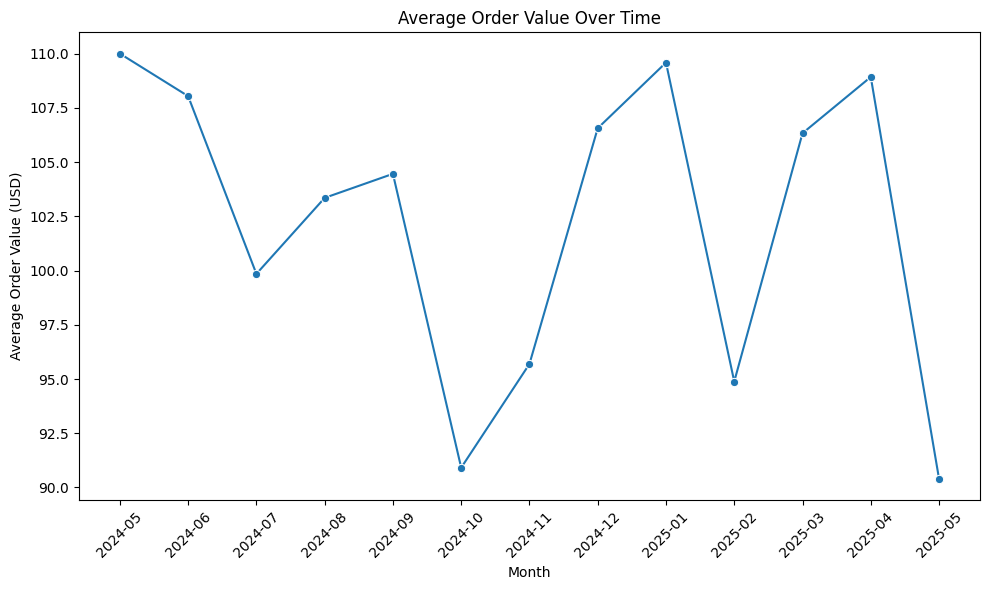

In [48]:
# Plotting the average order value over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_aov.index.astype(str), y=monthly_aov.values, marker='o')
plt.title('Average Order Value Over Time')
plt.xlabel('Month')
plt.ylabel('Average Order Value (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Visualizing Customer Segments (Customer Insights)

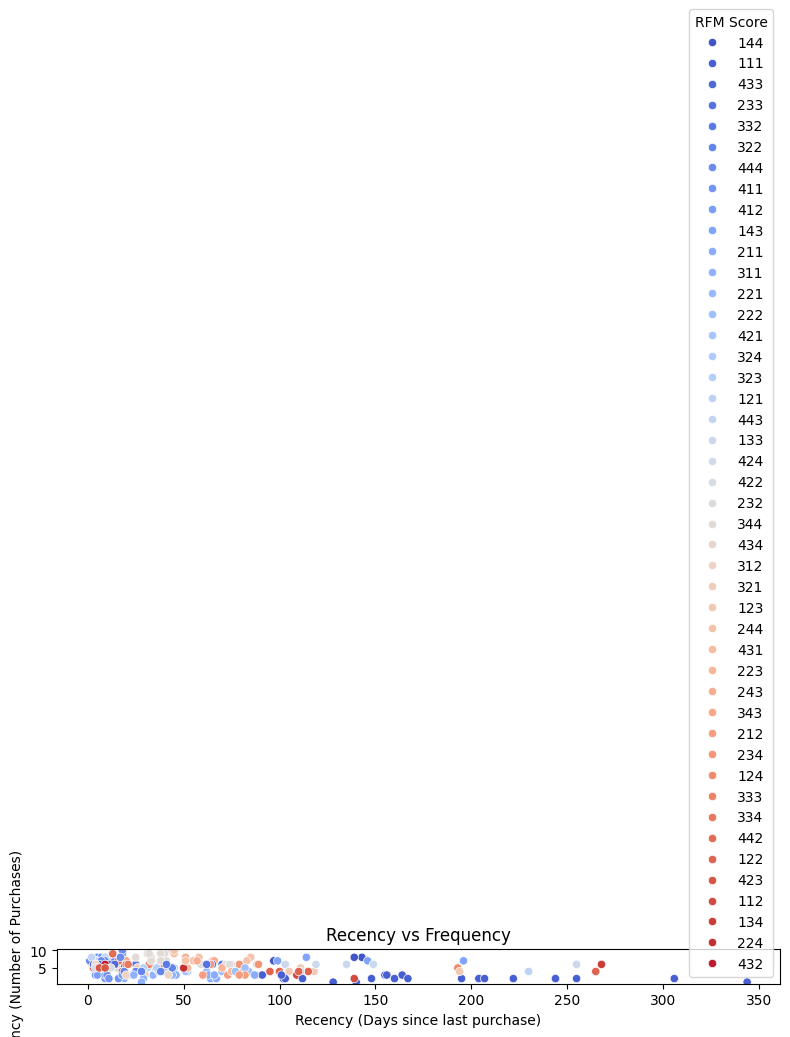

In [49]:
# Visualize Recency vs Frequency
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm_df, x='recency', y='frequency', hue='RFM_Score', palette='coolwarm')
plt.title('Recency vs Frequency')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Frequency (Number of Purchases)')
plt.legend(title='RFM Score')
plt.tight_layout()
plt.show()


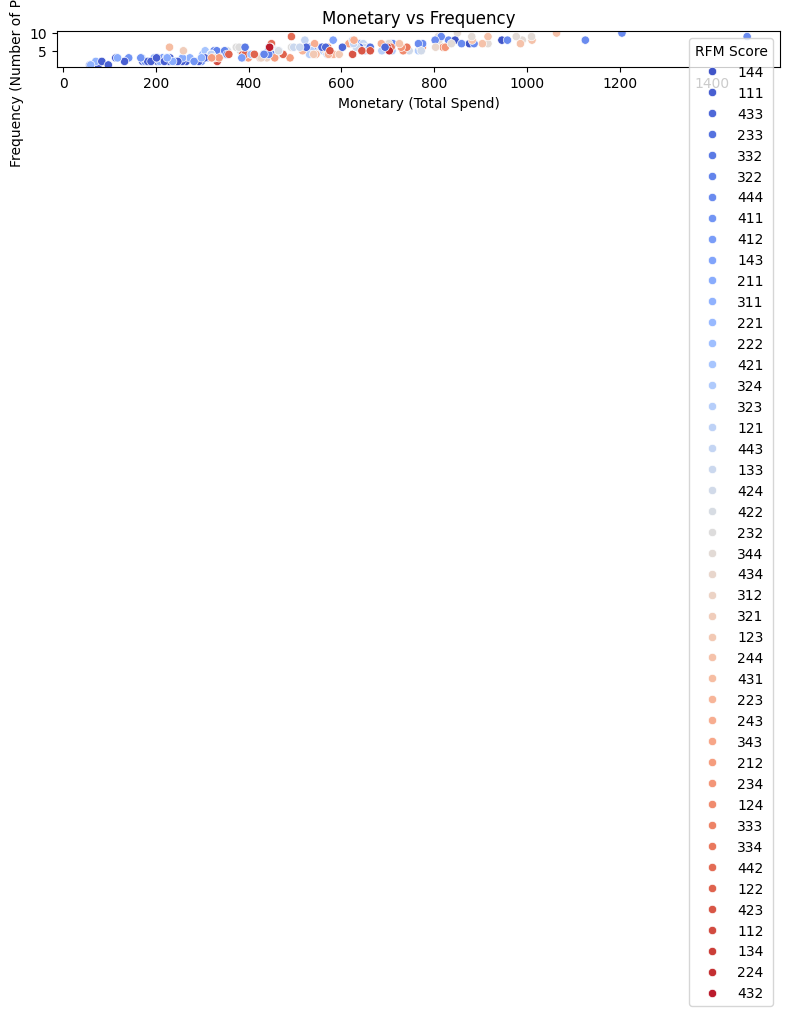

In [50]:
# Visualize Monetary vs Frequency
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm_df, x='monetary', y='frequency', hue='RFM_Score', palette='coolwarm')
plt.title('Monetary vs Frequency')
plt.xlabel('Monetary (Total Spend)')
plt.ylabel('Frequency (Number of Purchases)')
plt.legend(title='RFM Score')
plt.tight_layout()
plt.show()

In [51]:
import os
print(os.getcwd())

C:\Users\IT WORLD
